In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv('air quality data.csv')
df.head() 

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
# Shape - rows and cols!
df.shape

(29531, 16)

In [5]:
# Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
# To check missing values
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [7]:
df.isnull().sum().sort_values(ascending=False)

Xylene        18109
PM10          11140
NH3           10328
Toluene        8041
Benzene        5623
AQI            4681
AQI_Bucket     4681
PM2.5          4598
NOx            4185
O3             4022
SO2            3854
NO2            3585
NO             3582
CO             2059
City              0
Date              0
dtype: int64

In [9]:
df.shape

(29531, 16)

In [10]:
# Summary of Statistics in the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,67.450578,64.661449,0.04,28.820,48.57,80.5900,949.99
PM10,18391.0,118.127103,90.605110,0.01,56.255,95.68,149.7450,1000.00
NO,25949.0,17.574730,22.785846,0.02,5.630,9.89,19.9500,390.68
NO2,25946.0,28.560659,24.474746,0.01,11.750,21.69,37.6200,362.21
NOx,25346.0,32.309123,31.646011,0.00,12.820,23.52,40.1275,467.63
NH3,19203.0,23.483476,25.684275,0.01,8.580,15.85,30.0200,352.89
CO,27472.0,2.248598,6.962884,0.00,0.510,0.89,1.4500,175.81
SO2,25677.0,14.531977,18.133775,0.01,5.670,9.16,15.2200,193.86
O3,25509.0,34.491430,21.694928,0.01,18.860,30.84,45.5700,257.73
Benzene,23908.0,3.280840,15.811136,0.00,0.120,1.07,3.0800,455.03


In [11]:
# Percentage of the null values
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
null_values_percentage

Xylene        61.322001
PM10          37.723071
NH3           34.973418
Toluene       27.229014
Benzene       19.041008
AQI           15.851139
AQI_Bucket    15.851139
PM2.5         15.570079
NOx           14.171549
O3            13.619586
SO2           13.050692
NO2           12.139785
NO            12.129626
CO             6.972334
City           0.000000
Date           0.000000
dtype: float64

## WEEK-2 Visulization

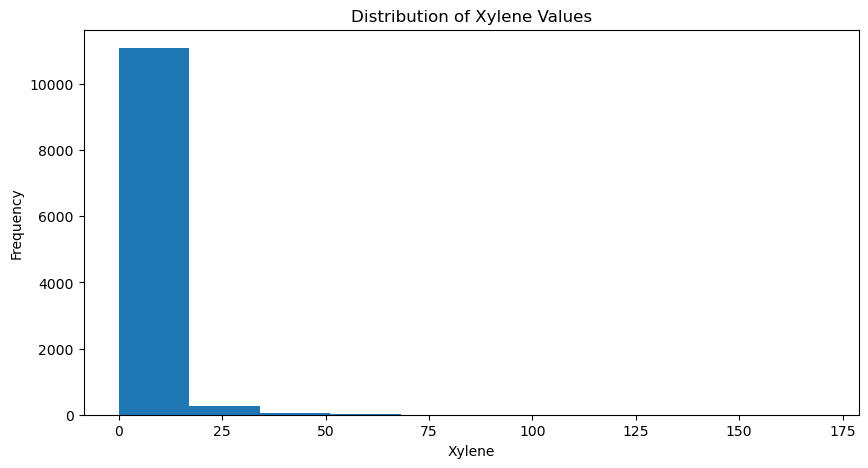

In [15]:
# Univariate analysis
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
df = pd.read_csv('air quality data.csv') 

# Now create the histogram
df['Xylene'].plot(kind='hist', figsize=(10,5))
plt.title('Distribution of Xylene Values')
plt.xlabel('Xylene')
plt.ylabel('Frequency')
plt.show()

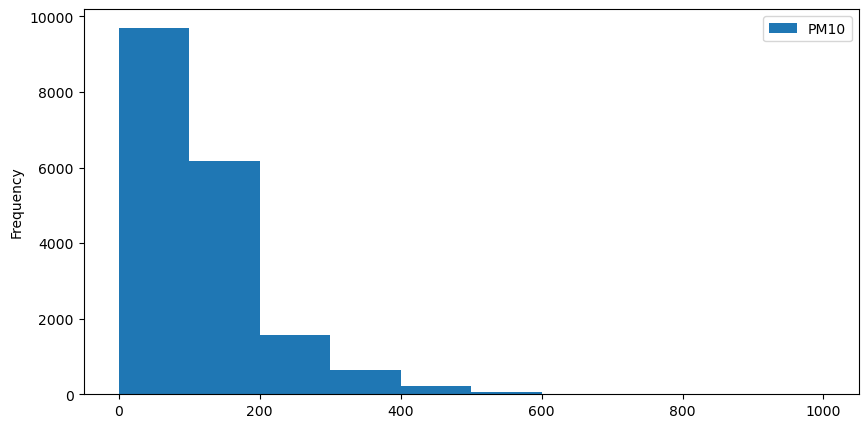

In [16]:
df['PM10'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

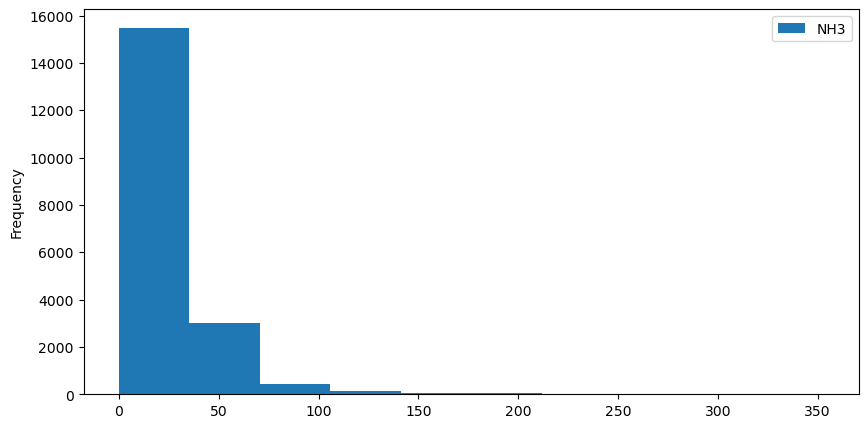

In [17]:
df['NH3'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

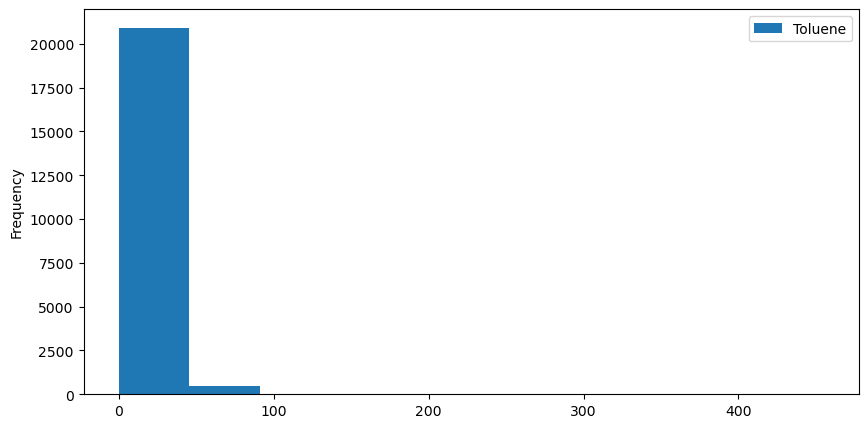

In [18]:
df['Toluene'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()


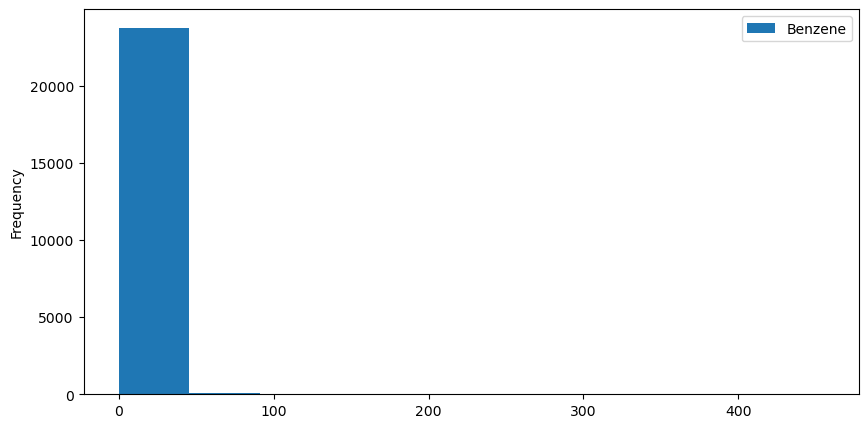

In [19]:
df['Benzene'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

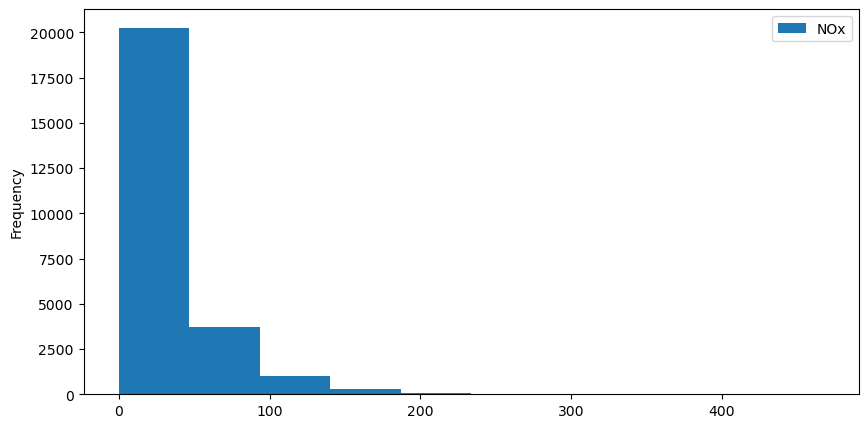

In [20]:
df['NOx'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

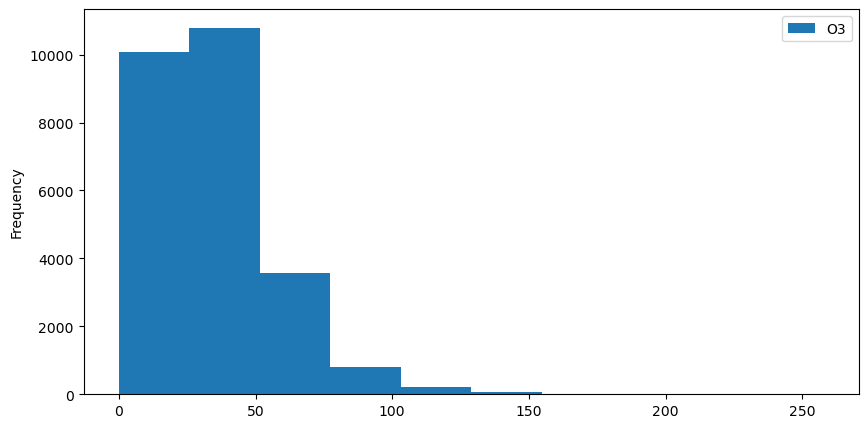

In [21]:
df['O3'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

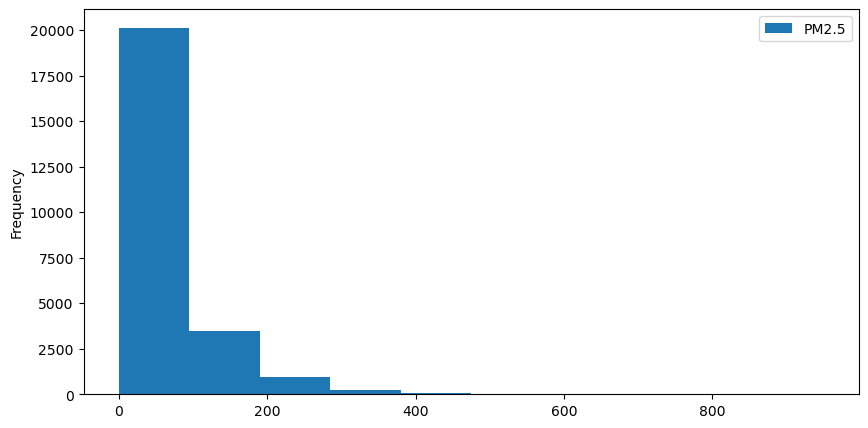

In [22]:
df['PM2.5'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

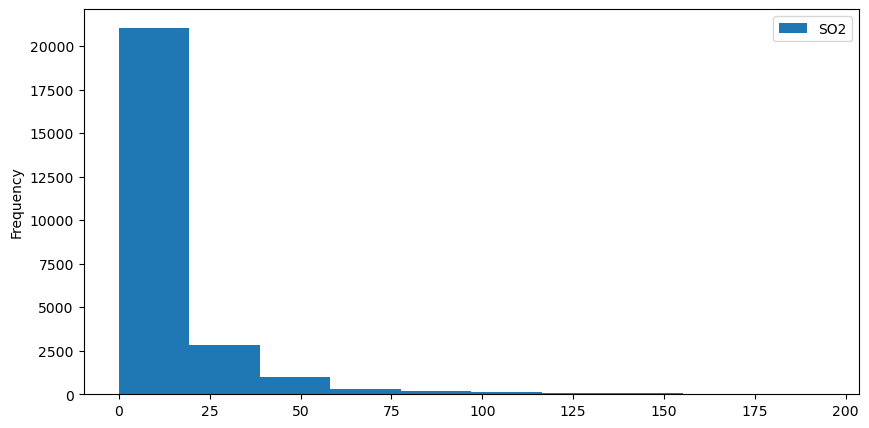

In [23]:
df['SO2'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

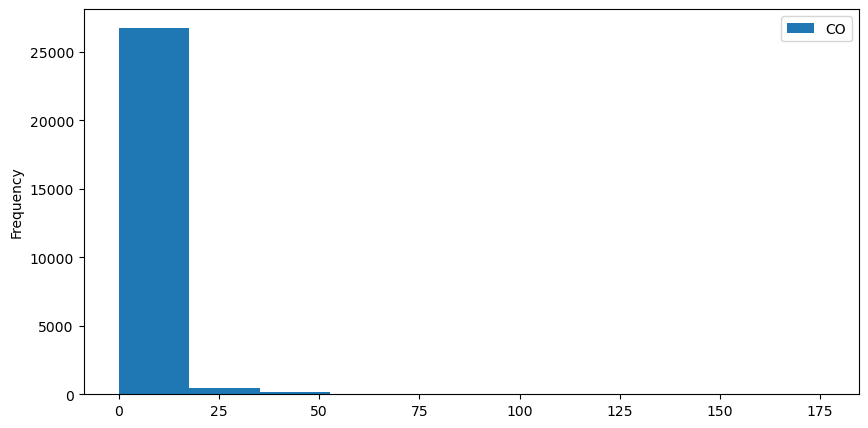

In [24]:
df['CO'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

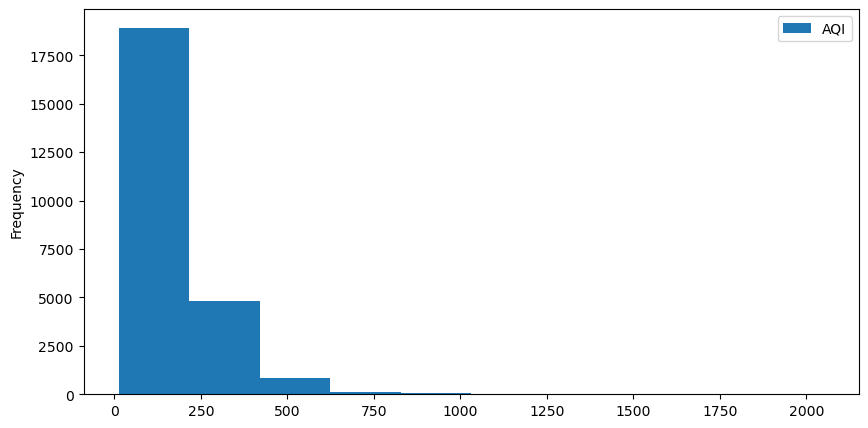

In [25]:
df['AQI'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

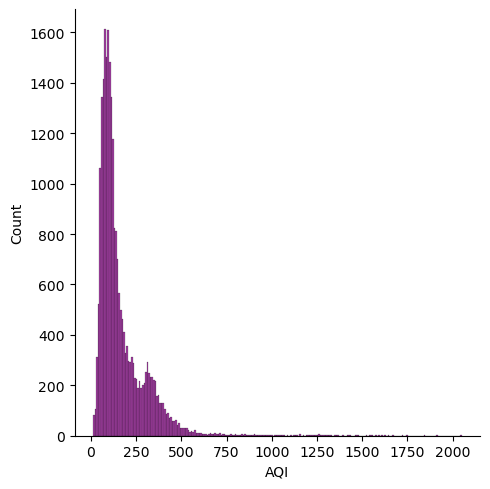

In [27]:
# Distribution of AQi from 2015 to 2020
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn

# Distribution of AQI from 2015 to 2020
sns.displot(df, x='AQI', color='purple')
plt.show()

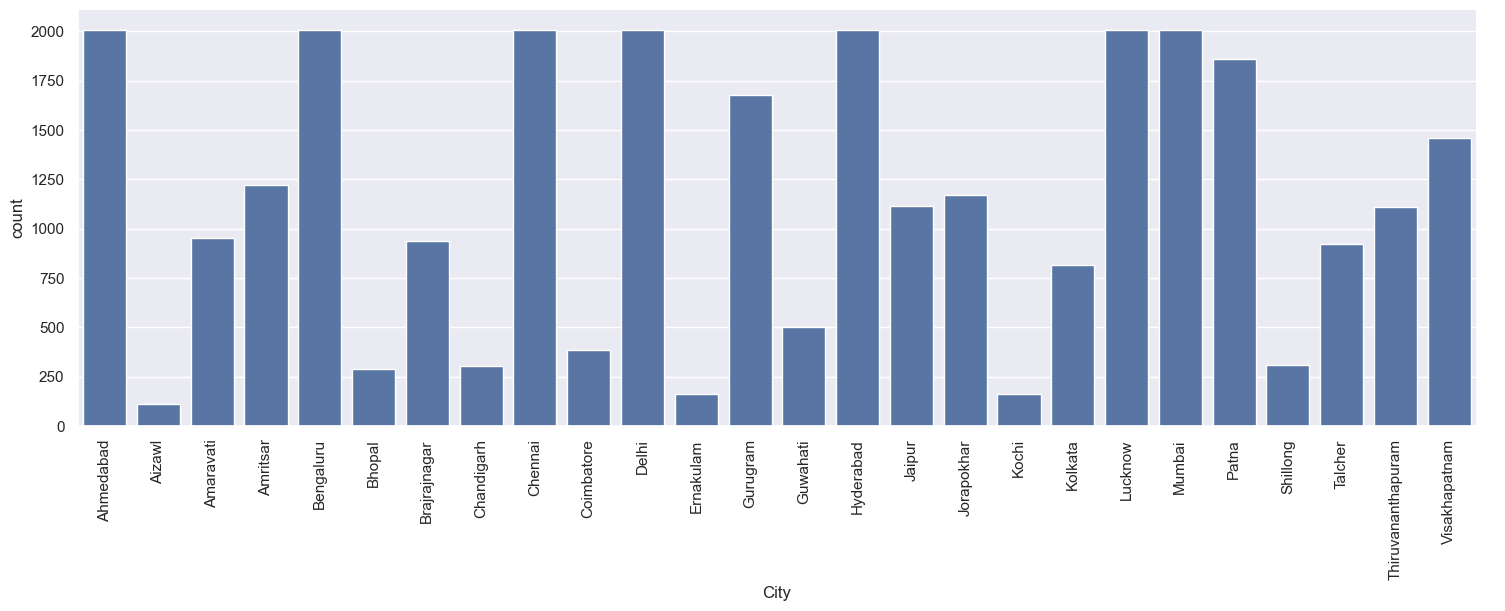

In [28]:
# Bivariate
sns.set_theme(style="darkgrid")
graph = sns.catplot(x="City", kind='count', data=df, height=5, aspect=3)
graph.set_xticklabels(rotation=90)

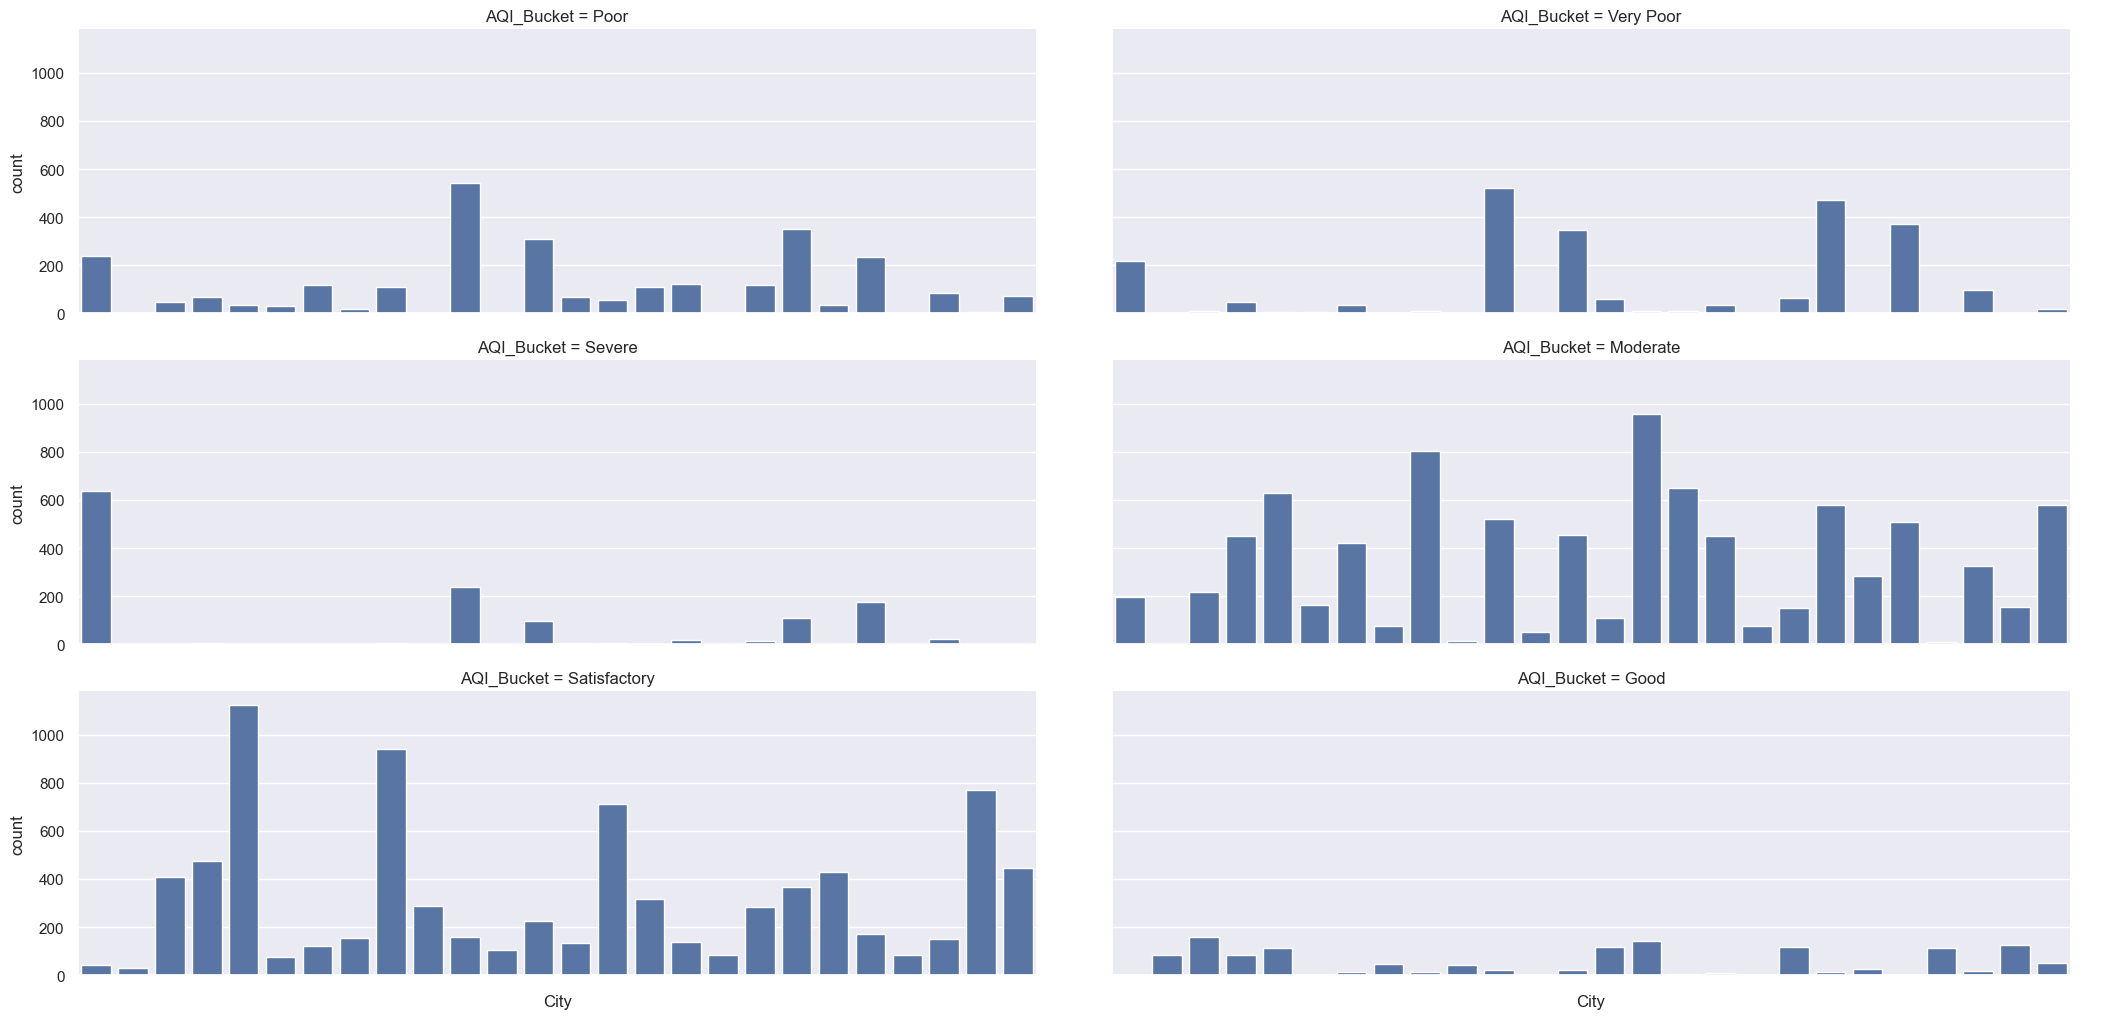

In [29]:
sns.set_theme(style="darkgrid")
graph = sns.catplot(x="City", kind='count', data=df, col="AQI_Bucket", col_wrap=2, 
                    height=3.5, aspect=3)
graph.set_xticklabels(rotation=90)

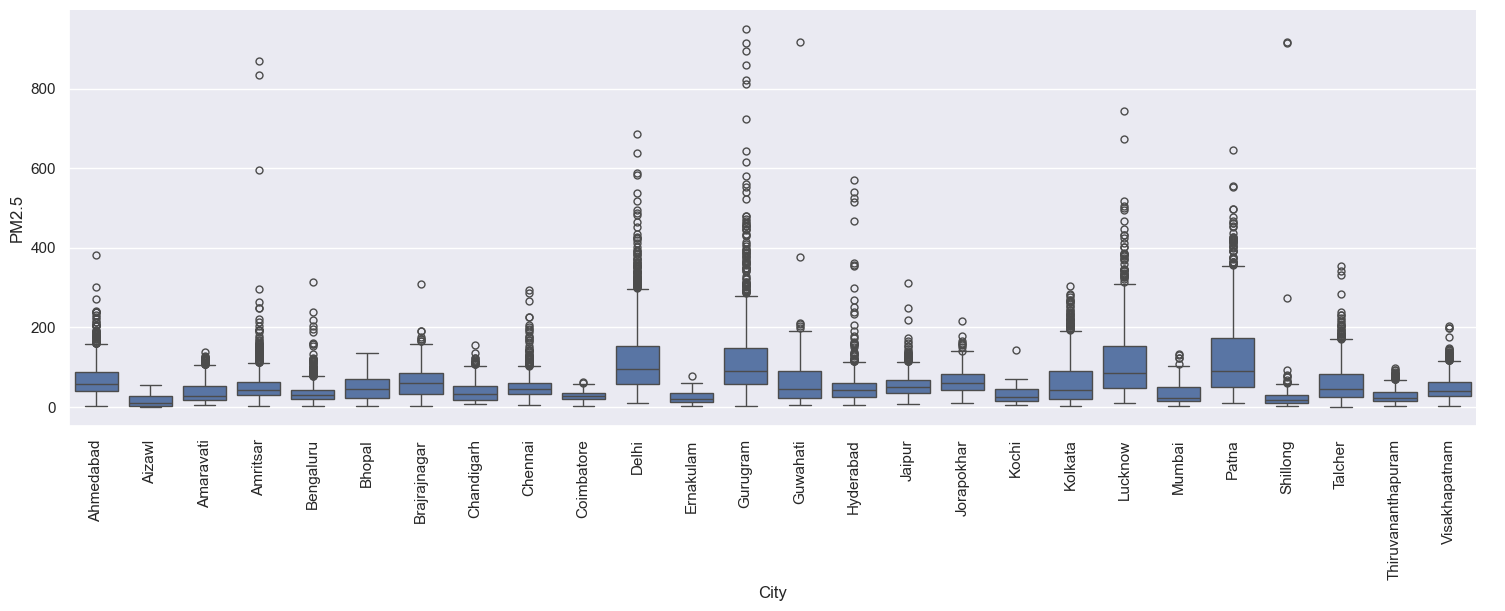

In [30]:
graph1 = sns.catplot(x='City', y='PM2.5', kind='box', data=df, height=5, aspect=3)
graph1.set_xticklabels(rotation=90)

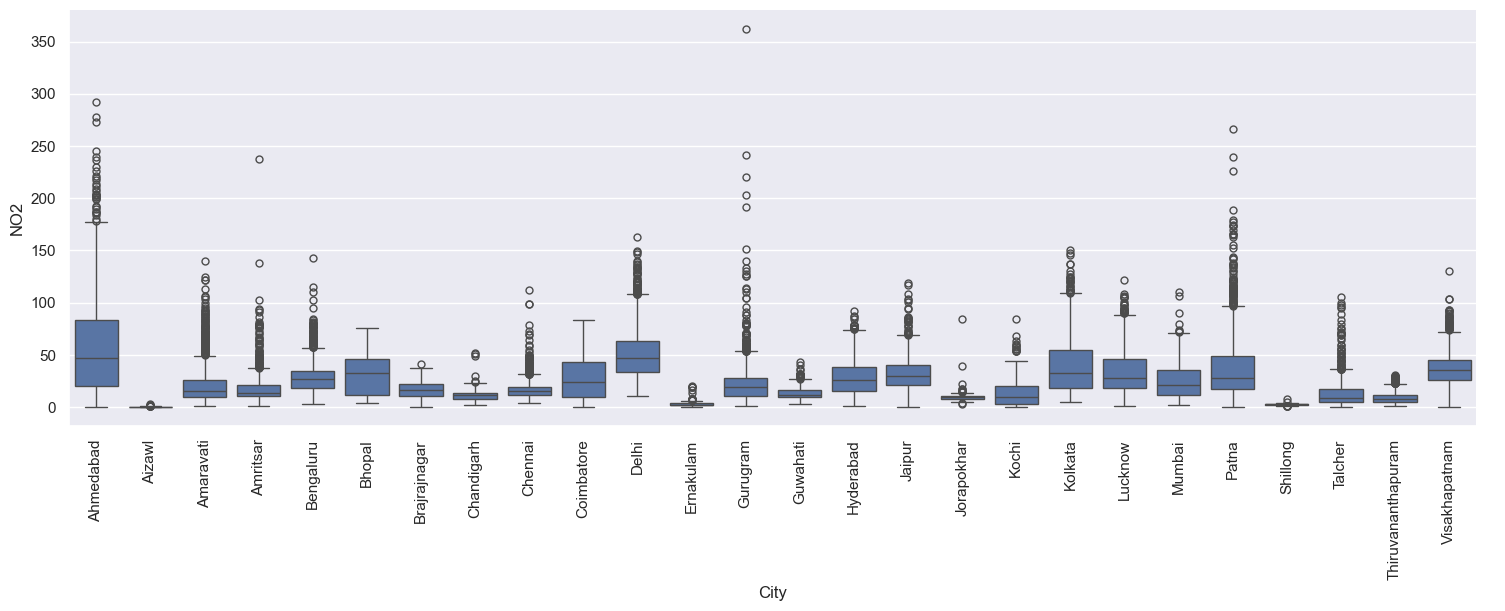

In [31]:
graph2 = sns.catplot(x='City', y='NO2', kind='box', data=df, height=5, aspect=3)
graph2.set_xticklabels(rotation=90)

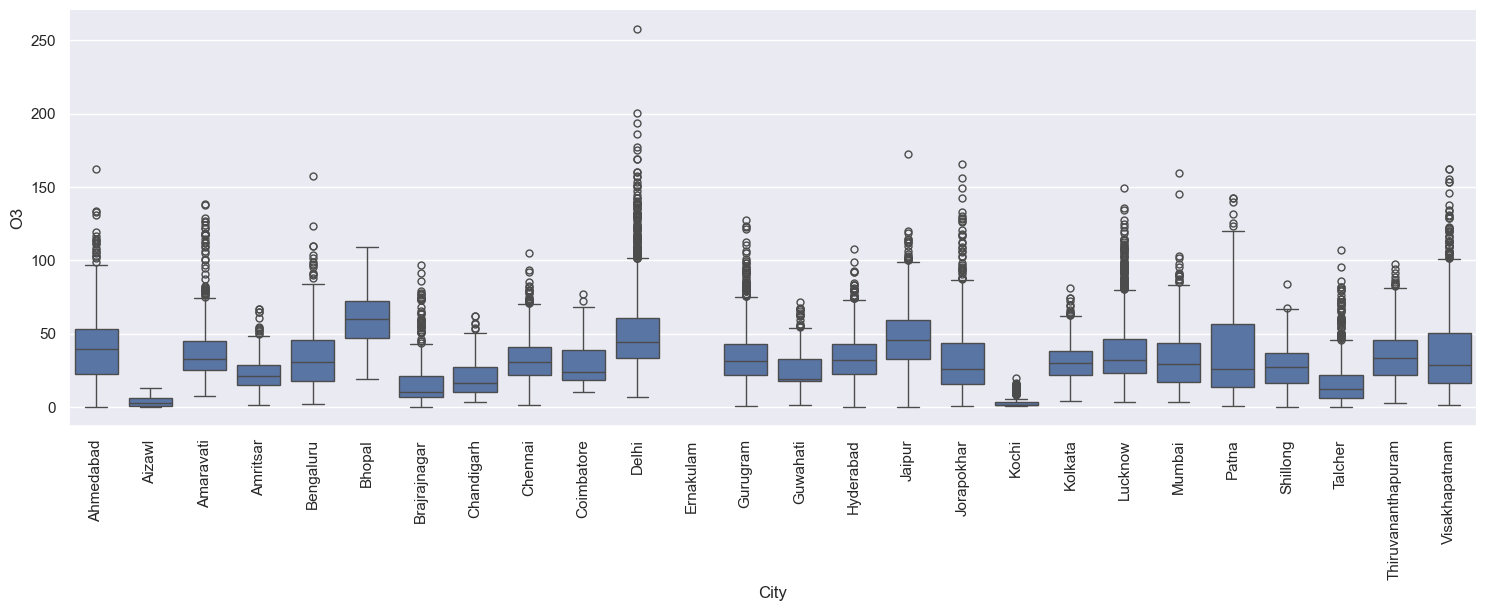

In [32]:
graph3 = sns.catplot(x='City', y='O3', kind='box', data=df, height=5, aspect=3)
graph3.set_xticklabels(rotation=90)

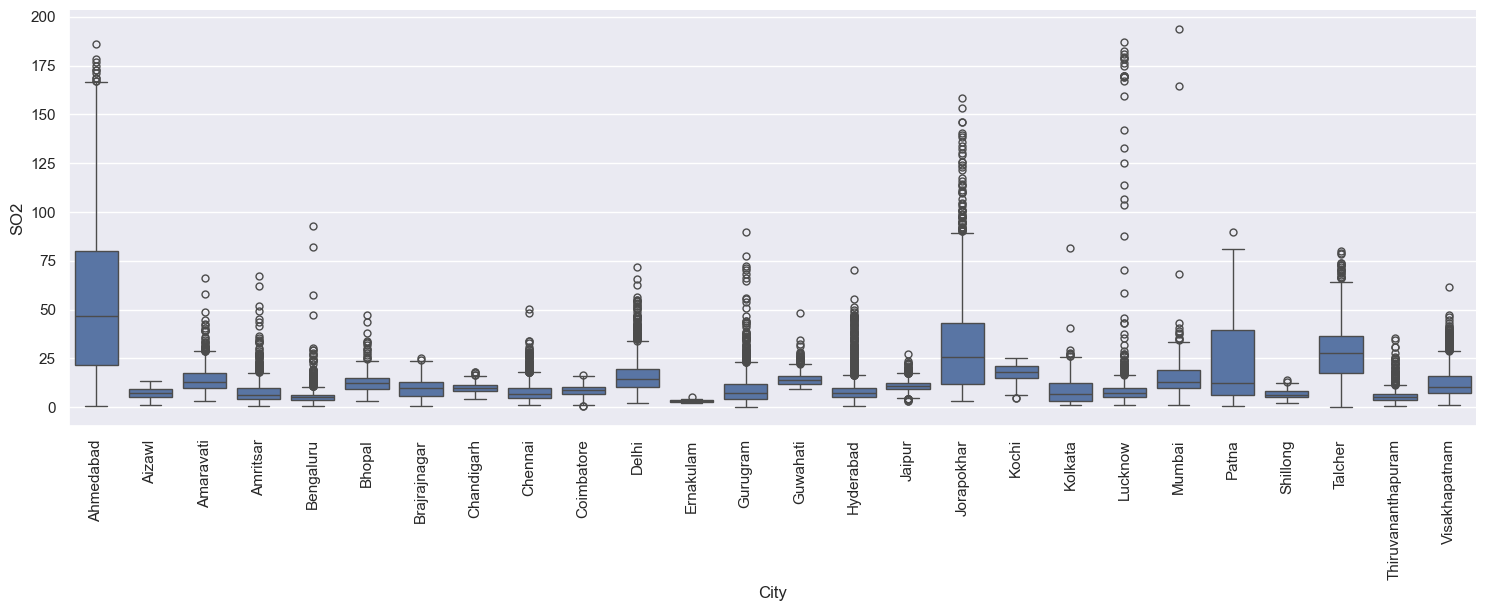

In [33]:
graph4 = sns.catplot(x='City', y='SO2', kind='box', data=df, height=5, aspect=3)
graph4.set_xticklabels(rotation=90)

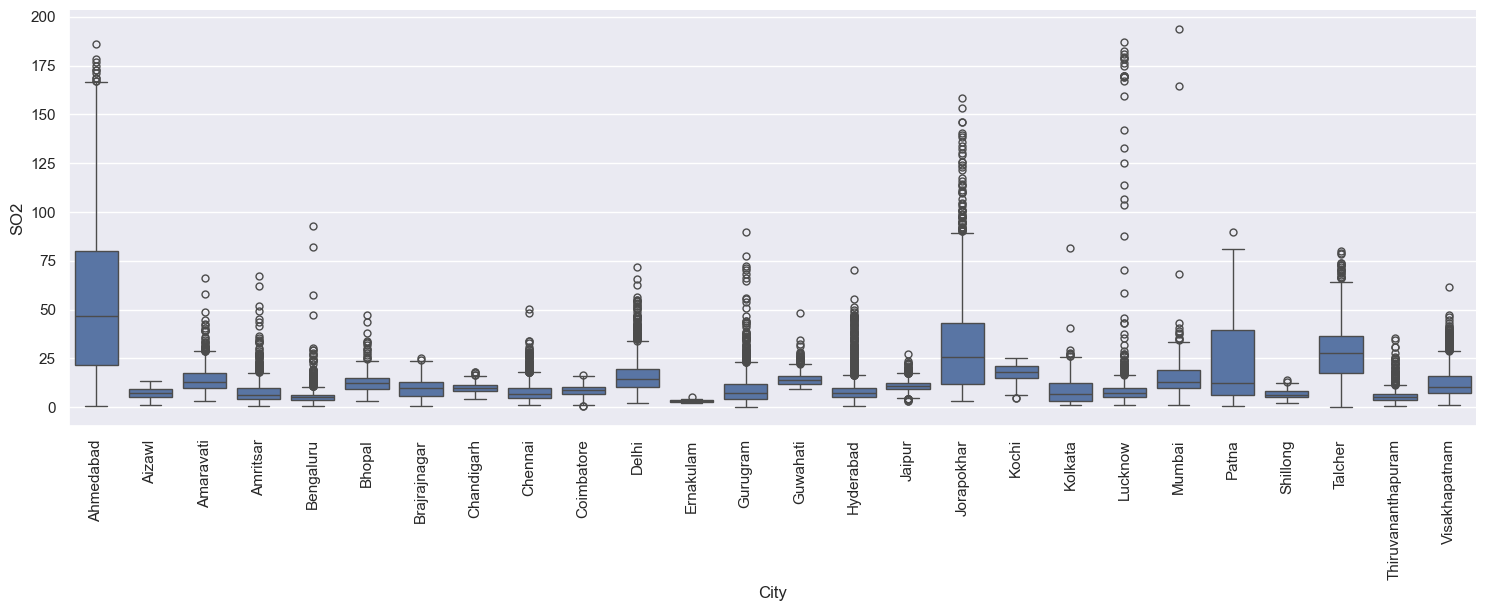

In [34]:
graph4 = sns.catplot(x='City', y='SO2', kind='box', data=df, height=5, aspect=3)
graph4.set_xticklabels(rotation=90)

In [35]:
# TO check the null values
df.isnull().sum().sort_values(ascending=False)

Xylene        18109
PM10          11140
NH3           10328
Toluene        8041
Benzene        5623
AQI            4681
AQI_Bucket     4681
PM2.5          4598
NOx            4185
O3             4022
SO2            3854
NO2            3585
NO             3582
CO             2059
City              0
Date              0
dtype: int64

In [36]:
df.describe().loc['mean']

PM2.5       67.450578
PM10       118.127103
NO          17.574730
NO2         28.560659
NOx         32.309123
NH3         23.483476
CO           2.248598
SO2         14.531977
O3          34.491430
Benzene      3.280840
Toluene      8.700972
Xylene       3.070128
AQI        166.463581
Name: mean, dtype: float64

In [38]:
import pandas as pd
import numpy as np  # Import NumPy

df = df.replace({
    "PM2.5": {np.nan: 67.476613},
    "PM10": {np.nan: 118.454435},
    "NO": {np.nan: 17.622421},
    "NO2": {np.nan: 28.978391},
    "NOx": {np.nan: 32.289012},
    "NH3": {np.nan: 23.848366},
    "CO": {np.nan: 2.345267},
    "SO2": {np.nan: 34.912885},
    "O3": {np.nan: 38.320547},
    "Benzene": {np.nan: 3.458668},
    "Toluene": {np.nan: 9.525714},
    "Xylene": {np.nan: 3.588683}
})

In [39]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI           4681
AQI_Bucket    4681
dtype: int64

In [40]:
df = df.drop(['AQI_Bucket'], axis=1)

In [41]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,67.476613,118.454435,0.92,18.22,17.15,23.848366,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,Ahmedabad,2015-01-02,67.476613,118.454435,0.97,15.69,16.46,23.848366,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,Ahmedabad,2015-01-03,67.476613,118.454435,17.40,19.30,29.70,23.848366,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,Ahmedabad,2015-01-04,67.476613,118.454435,1.70,18.48,17.97,23.848366,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,Ahmedabad,2015-01-05,67.476613,118.454435,22.10,21.42,37.76,23.848366,22.10,39.33,39.31,7.01,18.89,2.78,NaN


<Axes: >

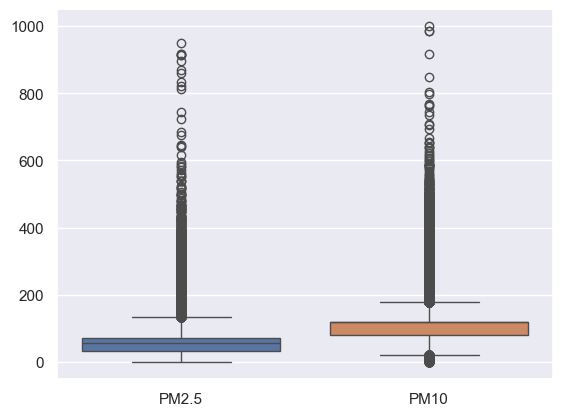

In [42]:
sns.boxplot(data=df[['PM2.5', 'PM10']])

<Axes: >

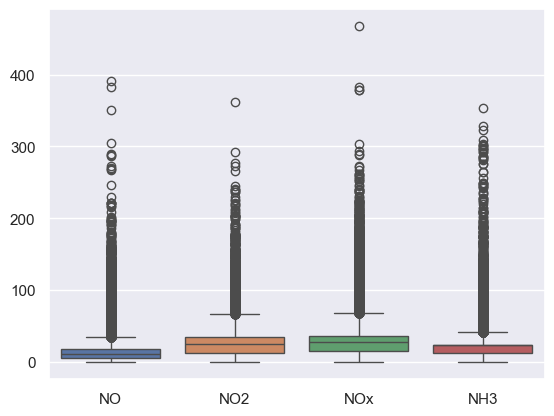

In [43]:
sns.boxplot(data=df[['NO', 'NO2', 'NOx', 'NH3']])

<Axes: >

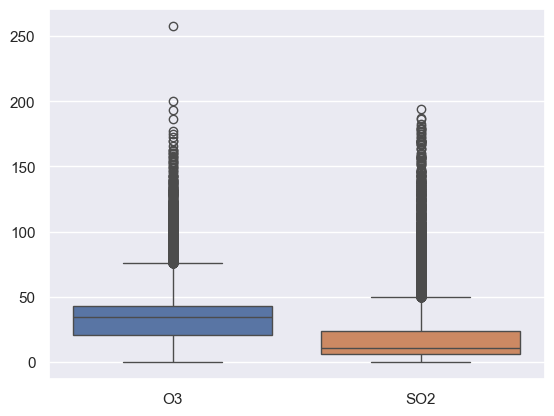

In [44]:
sns.boxplot(data=df[['O3', 'SO2']])

In [45]:
# IQR Method - Q3 Q1
def replace_outliers(df):
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lb = Q1 - 1.5 * IQR
        ub = Q3 + 1.5 * IQR
        df[column] = df[column].apply(
            lambda x: Q1 if x < lb else (Q3 if x > ub else x)
        )
    return df

In [46]:
df = replace_outliers(df)

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,29531.0,54.528579,26.614548,0.04,32.1500,58.030000,72.450000,132.89
PM10,29531.0,102.182854,32.745502,20.65,79.3175,118.454435,118.454435,177.16
NO,29531.0,12.410174,7.474268,0.02,6.2100,11.530000,17.622421,34.73
NO2,29531.0,25.099318,14.344193,0.01,12.9800,25.240000,34.662500,67.18
NOx,29531.0,26.098338,14.718195,0.00,14.6700,27.550000,36.012500,68.02
NH3,29531.0,19.473354,8.733465,0.01,12.0400,23.848366,23.848366,41.56
CO,29531.0,1.092829,0.745766,0.00,0.5400,0.950000,1.710000,3.46
SO2,29531.0,14.982196,11.530100,0.01,6.0900,10.480000,23.470000,49.53
O3,29531.0,32.921258,15.727162,0.01,20.7400,34.780000,42.730000,75.71
Benzene,29531.0,2.067875,1.830508,0.00,0.2400,1.840000,3.458668,8.28


<Axes: >

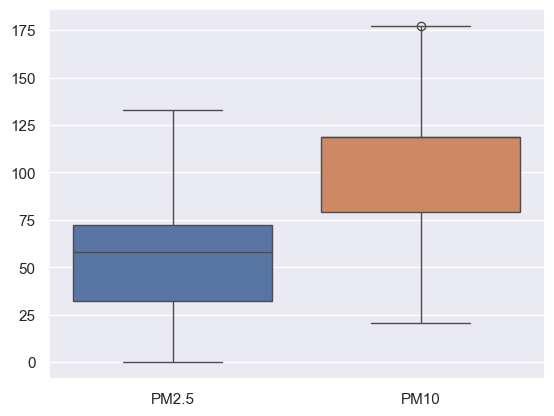

In [48]:
sns.boxplot(data=df[['PM2.5', 'PM10']])

<Axes: >

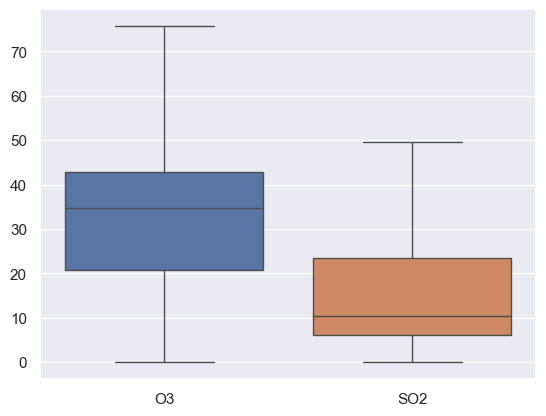

In [49]:
sns.boxplot(data=df[['O3', 'SO2']])

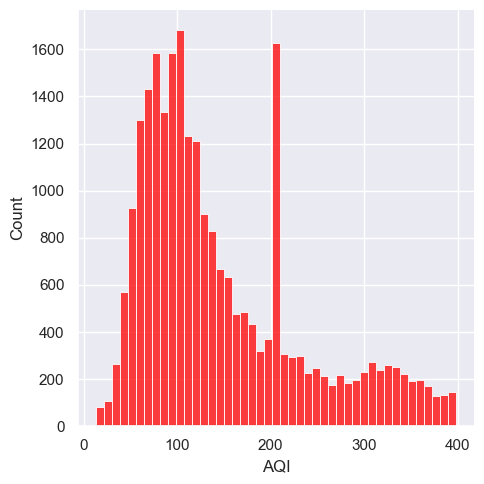

In [50]:
sns.displot(df, x='AQI', color='red')
plt.show()

In [51]:
df1 = df.drop(columns=['City'])

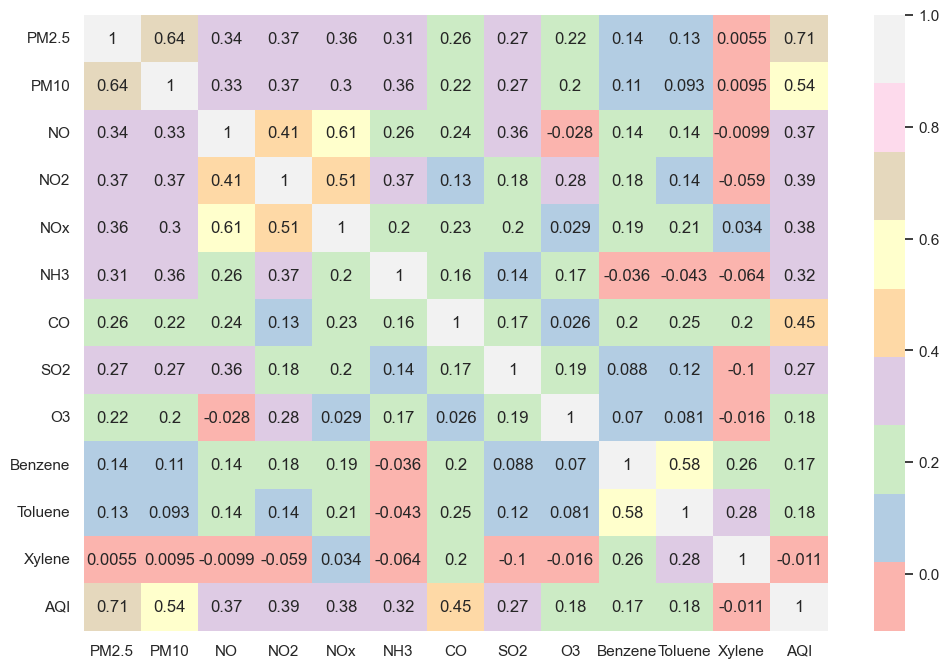

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df1.select_dtypes(include=['float64', 'int64'])

# Multivariate Analysis - Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Pastel1')
plt.show()